# Communicate Data Findings: RITA Flight Data in 2008
## by HyunGyung Lee

## Preliminary Wrangling

> This dataset reports flights in the United States, including carriers, arrival and departure delays, and reasons for delays in 2008.
The data comes originally from RITA.
Downloaded source is https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/HG7NV7. 

> Datasets used in this project:
    1. `2008.csv` : Main dataset to anlayze
    2. `airports.csv` : Describes the international airport abbreviation code name of the airport
    3. `carriers.csv` : Listing of carrier codes with full names
    4. `plane-data.csv` : Information about some individual planes

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('2008.csv')
df.head(10)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,1343.0,1325,1451.0,1435,WN,588,...,4.0,9.0,0,NaN,0,16.0,0.0,0.0,0.0,0.0
1,2008,1,3,4,1125.0,1120,1247.0,1245,WN,1343,...,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,2009.0,2015,2136.0,2140,WN,3841,...,2.0,14.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,903.0,855,1203.0,1205,WN,3,...,5.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1423.0,1400,1726.0,1710,WN,25,...,6.0,10.0,0,NaN,0,16.0,0.0,0.0,0.0,0.0
5,2008,1,3,4,2024.0,2020,2325.0,2325,WN,51,...,13.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
6,2008,1,3,4,1753.0,1745,2053.0,2050,WN,940,...,6.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
7,2008,1,3,4,622.0,620,935.0,930,WN,2621,...,7.0,19.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
8,2008,1,3,4,1944.0,1945,2210.0,2215,WN,389,...,7.0,15.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
9,2008,1,3,4,1453.0,1425,1716.0,1650,WN,519,...,6.0,13.0,0,NaN,0,11.0,0.0,0.0,0.0,15.0


In [3]:
# high-level overview of data shape and composition
print(df.shape)
print(df.info())

(2389217, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2389217 entries, 0 to 2389216
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  TailNum            object 
 11  ActualElapsedTime  float64
 12  CRSElapsedTime     float64
 13  AirTime            float64
 14  ArrDelay           float64
 15  DepDelay           float64
 16  Origin             object 
 17  Dest               object 
 18  Distance           int64  
 19  TaxiIn             float64
 20  TaxiOut            float64
 21  Cancelled          int64  
 22  CancellationCode   object 
 23  Diverted           int64  
 24  CarrierDelay       float64
 25  Weat

In [4]:
df.describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,2389217.0,2.389217e+06,2.389217e+06,2.389217e+06,2.324775e+06,2.389217e+06,2.319121e+06,2.389217e+06,2.389217e+06,2.319121e+06,...,2.389217e+06,2.319121e+06,2.324775e+06,2.389217e+06,2.389217e+06,584583.000000,584583.000000,584583.000000,584583.000000,584583.000000
mean,2008.0,2.505009e+00,1.566386e+01,3.909625e+00,1.340018e+03,1.329992e+03,1.485835e+03,1.496744e+03,2.213888e+03,1.286189e+02,...,7.261589e+02,6.839862e+00,1.668584e+01,2.697202e-02,2.366466e-03,15.752957,2.938243,16.158462,0.080459,20.976710
std,0.0,1.121493e+00,8.750405e+00,1.980431e+00,4.802717e+02,4.657833e+02,5.081295e+02,4.845238e+02,1.951392e+03,7.025303e+01,...,5.571763e+02,4.846435e+00,1.102905e+01,1.620017e-01,4.858875e-02,40.035487,19.166662,30.534167,1.742579,38.617154
min,2008.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.400000e+01,...,1.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2008.0,1.000000e+00,8.000000e+00,2.000000e+00,9.300000e+02,9.270000e+02,1.110000e+03,1.115000e+03,6.050000e+02,7.800000e+01,...,3.250000e+02,4.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2008.0,3.000000e+00,1.600000e+01,4.000000e+00,1.330000e+03,1.325000e+03,1.516000e+03,1.520000e+03,1.544000e+03,1.110000e+02,...,5.830000e+02,6.000000e+00,1.400000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,5.000000,0.000000,0.000000
75%,2008.0,4.000000e+00,2.300000e+01,6.000000e+00,1.733000e+03,1.720000e+03,1.914000e+03,1.910000e+03,3.631000e+03,1.600000e+02,...,9.570000e+02,8.000000e+00,1.900000e+01,0.000000e+00,0.000000e+00,16.000000,0.000000,20.000000,0.000000,27.000000
max,2008.0,4.000000e+00,3.100000e+01,7.000000e+00,2.400000e+03,2.359000e+03,2.400000e+03,2.400000e+03,9.741000e+03,9.050000e+02,...,4.962000e+03,2.130000e+02,3.830000e+02,1.000000e+00,1.000000e+00,2436.000000,1148.000000,1357.000000,392.000000,1254.000000


### Cleaning Data

In [5]:
df_clean = df.copy()

In [6]:
# Apply a function that converts unique code to full data
## Load data tables

carriers = pd.read_csv('carriers.csv')
airports = pd.read_csv('airports.csv')
plane_data = pd.read_csv('plane-data.csv')

In [7]:
# Apply a function that converts unique code to full data
## UniqueCarrier code -> convert to full name of carrier
## TailNum code -> add manufacturer column

df_join = df_clean.join( plane_data[['tailnum', 'manufacturer']].set_index('tailnum'), how='left', on='TailNum') \
.join( carriers.rename(columns={'Description':'Carrier_Name'}).set_index('Code'), how='left', on='UniqueCarrier')

In [8]:
df_join

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,manufacturer,Carrier_Name
0,2008,1,3,4,1343.0,1325,1451.0,1435,WN,588,...,0,NaN,0,16.0,0.0,0.0,0.0,0.0,BOEING,Southwest Airlines Co.
1,2008,1,3,4,1125.0,1120,1247.0,1245,WN,1343,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,BOEING,Southwest Airlines Co.
2,2008,1,3,4,2009.0,2015,2136.0,2140,WN,3841,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,BOEING,Southwest Airlines Co.
3,2008,1,3,4,903.0,855,1203.0,1205,WN,3,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,BOEING,Southwest Airlines Co.
4,2008,1,3,4,1423.0,1400,1726.0,1710,WN,25,...,0,NaN,0,16.0,0.0,0.0,0.0,0.0,BOEING,Southwest Airlines Co.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2389212,2008,4,17,4,1025.0,1025,1234.0,1237,DL,1207,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,BOEING,Delta Air Lines Inc.
2389213,2008,4,17,4,1319.0,1320,1527.0,1524,DL,1208,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,MCDONNELL DOUGLAS AIRCRAFT CO,Delta Air Lines Inc.
2389214,2008,4,17,4,1335.0,1335,1556.0,1553,DL,1209,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,BOEING,Delta Air Lines Inc.
2389215,2008,4,17,4,1933.0,1935,2140.0,2141,DL,1210,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,BOEING,Delta Air Lines Inc.


In [9]:
df_join.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2389217 entries, 0 to 2389216
Data columns (total 31 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  TailNum            object 
 11  ActualElapsedTime  float64
 12  CRSElapsedTime     float64
 13  AirTime            float64
 14  ArrDelay           float64
 15  DepDelay           float64
 16  Origin             object 
 17  Dest               object 
 18  Distance           int64  
 19  TaxiIn             float64
 20  TaxiOut            float64
 21  Cancelled          int64  
 22  CancellationCode   object 
 23  Diverted           int64  
 24  CarrierDelay       float64
 25  WeatherDelay      

In [10]:
# Delete useless columns in analysis
df_master = df_join.drop(['Year','Month', 'DayofMonth', 'DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
                    'Origin','ActualElapsedTime', 'CRSElapsedTime', 'Dest', 'TaxiIn', 'TaxiOut', 'Cancelled', 'CancellationCode', 
                          'Diverted', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'], 1)
df_master

,DayOfWeek,AirTime,ArrDelay,DepDelay,Distance,manufacturer,Carrier_Name
0,4,55.0,16.0,18.0,393,BOEING,Southwest Airlines Co.
1,4,71.0,2.0,5.0,441,BOEING,Southwest Airlines Co.
2,4,71.0,-4.0,-6.0,441,BOEING,Southwest Airlines Co.
3,4,108.0,-2.0,8.0,848,BOEING,Southwest Airlines Co.
4,4,107.0,16.0,23.0,848,BOEING,Southwest Airlines Co.
...,...,...,...,...,...,...,...
2389212,4,108.0,-3.0,0.0,752,BOEING,Delta Air Lines Inc.
2389213,4,107.0,3.0,-1.0,752,MCDONNELL DOUGLAS AIRCRAFT CO,Delta Air Lines Inc.
2389214,4,103.0,3.0,0.0,752,BOEING,Delta Air Lines Inc.
2389215,4,106.0,-1.0,-2.0,752,BOEING,Delta Air Lines Inc.


In [11]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2389217 entries, 0 to 2389216
Data columns (total 7 columns):
 #   Column        Dtype  
---  ------        -----  
 0   DayOfWeek     int64  
 1   AirTime       float64
 2   ArrDelay      float64
 3   DepDelay      float64
 4   Distance      int64  
 5   manufacturer  object 
 6   Carrier_Name  object 
dtypes: float64(3), int64(2), object(2)
memory usage: 127.6+ MB


In [12]:
# Fix erroneous datatypes
# int -> category
df_master.DayOfWeek = df_master.DayOfWeek.astype('category')

In [13]:
# descriptive statistics for numeric variables
df_master.describe()

,AirTime,ArrDelay,DepDelay,Distance
count,2.319121e+06,2.319121e+06,2.324775e+06,2.389217e+06
mean,1.051016e+02,1.027357e+01,1.143636e+01,7.261589e+02
std,6.766801e+01,3.963429e+01,3.653229e+01,5.571763e+02
min,0.000000e+00,-9.100000e+01,-9.200000e+01,1.700000e+01
25%,5.600000e+01,-9.000000e+00,-4.000000e+00,3.250000e+02
50%,8.700000e+01,0.000000e+00,0.000000e+00,5.830000e+02
75%,1.340000e+02,1.500000e+01,1.100000e+01,9.570000e+02
max,8.860000e+02,2.461000e+03,2.467000e+03,4.962000e+03


### What is the structure of your dataset?

> - There are 2389217 flights in the dataset with 21 variables. 
- Numeric varibles like ActualElapsedTime are time related variables.
- Measurement of time related variables is minutes
  

### What is/are the main feature(s) of interest in your dataset?

> In this project, I would like to address the following topics related to increase of delay time of flights
Main queations:

- What is the relationship between AirTime or Distance with increase of delay time?
- Are there certain carriers or manufacturers that have long delays?
- What is the day of the week when delays occur the most?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect that several variables will have the effec on increase of delay time. I also think that month, day will have effects on flight.
- Air Time, Distance, manufacturer, Carrier_Name, and DayOfWeek will have relation with delay time   


## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

#### I'll start by looking at the distribution of the main variable of interest: 
1. ArrDelay: arrival delay, in minutes
2. DepDelay:departure delay, in minute

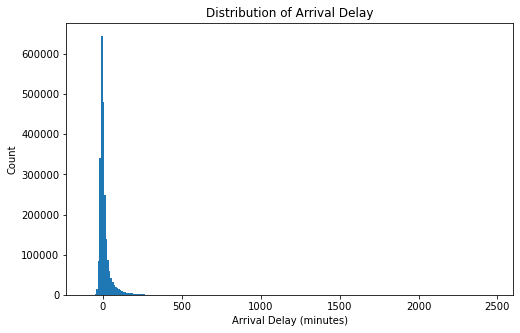

In [14]:
# start with a standard-scaled plot
binsize = 10
bins = np.arange(df_master['ArrDelay'].min()-binsize, df_master['ArrDelay'].max()+binsize, binsize)


plt.figure(figsize=[8, 5])
plt.hist(data = df_master, x = 'ArrDelay', bins = bins)
plt.xlabel('Arrival Delay (minutes)')
plt.ylabel('Count')
plt.title('Distribution of Arrival Delay')
plt.show()

It looks like a long tail in the distribution with outliers. Approximately 99% of the flights are delayed less then 500 minutes. Also, according to descriptive statistics, value of 75% is about 150. Therefore outliers should be eliminated. I'll filter out outliers with IQR

In [15]:
# Remove outliers with IQR
# ref: https://stackoverflow.com/questions/34782063/how-to-use-pandas-filter-with-iqr

# finding IQR with Departure delay time
dQ1 = df_master['DepDelay'].quantile(0.25)
dQ3 = df_master['DepDelay'].quantile(0.75)

dIQR = dQ3 - dQ1

# finding IQR with Arrival delay time
aQ1 = df_master['ArrDelay'].quantile(0.25)
aQ3 = df_master['ArrDelay'].quantile(0.75)

aIQR = aQ3 - aQ1

# Fillter out outliers
df_filtered = df_master.query( '(@dQ1 - 1.5 * @dIQR) <= DepDelay <= (@dQ3 + 1.5 * @dIQR) and (@aQ1 - 1.5 * @aIQR) <= ArrDelay <= (@aQ3 + 1.5 * @aIQR)' )

In [16]:
df_filtered.describe()

,AirTime,ArrDelay,DepDelay,Distance
count,2.014075e+06,2.014075e+06,2.014075e+06,2.014075e+06
mean,1.046829e+02,-8.419076e-01,1.033693e+00,7.277747e+02
std,6.769628e+01,1.439182e+01,9.135773e+00,5.598950e+02
min,0.000000e+00,-4.500000e+01,-2.600000e+01,2.400000e+01
25%,5.600000e+01,-1.000000e+01,-5.000000e+00,3.260000e+02
50%,8.600000e+01,-3.000000e+00,-1.000000e+00,5.810000e+02
75%,1.340000e+02,7.000000e+00,4.000000e+00,9.580000e+02
max,6.580000e+02,5.100000e+01,3.300000e+01,4.962000e+03


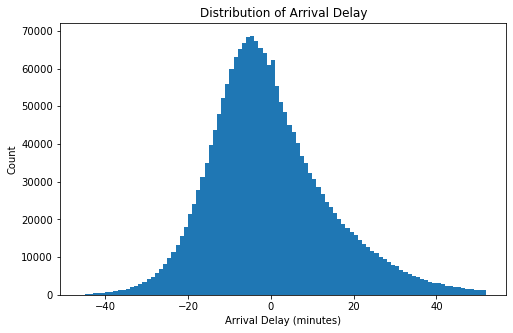

In [17]:
# start again with a standard-scaled(miniutes) plot
# distribution of Arrival Delay

binsize = 1
bins = np.arange(df_filtered['ArrDelay'].min()-binsize, df_filtered['ArrDelay'].max()+binsize*2, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_filtered, x = 'ArrDelay', bins = bins)
plt.xlabel('Arrival Delay (minutes)') 
plt.ylabel('Count')
plt.title('Distribution of Arrival Delay')
plt.show()

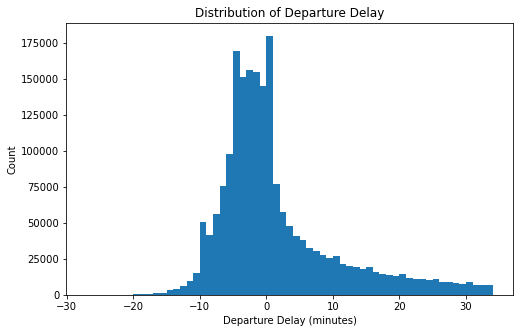

In [18]:
# start again with a standard-scaled(miniutes) plot
# distribution of Departure Delay

binsize = 1
bins = np.arange(df_filtered['DepDelay'].min()-binsize, df_filtered['DepDelay'].max()+binsize*2, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_filtered, x = 'DepDelay', bins = bins)
plt.xlabel('Departure Delay (minutes)')
plt.ylabel('Count')
plt.title('Distribution of Departure Delay')
plt.show()

Both Arrival Delay and Departure Delay are **unimodal** and **skewed right**. Arrival Delay plot seems beautifully distributed but slightly skewed.  Departure Delay looks narrower than a normal distribution.

Next up, the first predictor variable of interest: <U>AirTime and Distance</U>

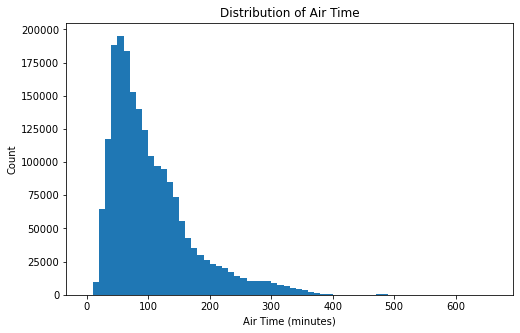

In [19]:
# plotting AirTime 

binsize = 10
bins = np.arange(0, df_filtered['AirTime'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_filtered, x = 'AirTime', bins = bins)
plt.xlabel('Air Time (minutes)')
plt.ylabel('Count')
plt.title('Distribution of Air Time')
plt.show()

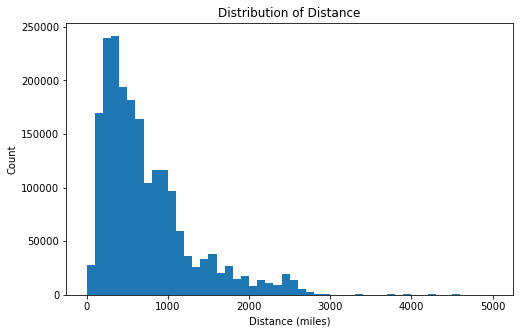

In [20]:
# plotting Distance

binsize = 100
bins = np.arange(0, df_filtered['Distance'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_filtered, x = 'Distance', bins = bins)
plt.xlabel('Distance (miles)')
plt.ylabel('Count')
plt.title('Distribution of Distance')
plt.show()

Both AirTime and Distance plots shows right skewed and need to be fixed removing the outliers. Distribution of Air Time looks like 99% of flights are less then 400 minutes. Similarly most of flights are under 3000 miles as second plot shows. 

Therefore I'll eliminate outliers both AirTime and Distance.

In [21]:
# remove outliers
df_filtered = df_filtered.query("AirTime <= 400" and  "Distance <= 3000")

In [22]:
df_filtered.describe()

,AirTime,ArrDelay,DepDelay,Distance
count,2.011166e+06,2.011166e+06,2.011166e+06,2.011166e+06
mean,1.041560e+02,-8.411638e-01,1.032946e+00,7.230080e+02
std,6.627263e+01,1.438674e+01,9.135362e+00,5.458340e+02
min,0.000000e+00,-4.500000e+01,-2.600000e+01,2.400000e+01
25%,5.600000e+01,-1.000000e+01,-5.000000e+00,3.260000e+02
50%,8.600000e+01,-3.000000e+00,-1.000000e+00,5.810000e+02
75%,1.340000e+02,7.000000e+00,4.000000e+00,9.570000e+02
max,4.640000e+02,5.100000e+01,3.300000e+01,2.994000e+03


Next, I'll move on to the categorical variables in the dataset: <U>DayOfWeek, manufacturer, Carrier_Name</U>

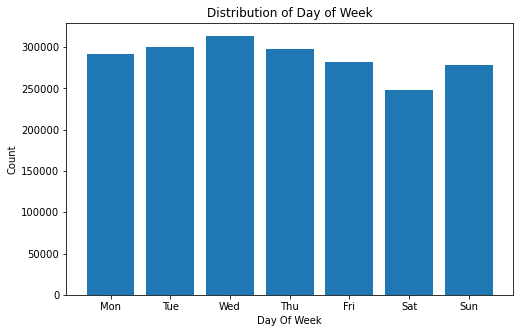

In [23]:
# plotting DayOfWeek

DayOfWeeKLabel = [ 'Mon','Tue','Wed', 'Thu','Fri', 'Sat', 'Sun']

plt.figure(figsize=[8, 5])
plt.bar(x = df_filtered.DayOfWeek.value_counts().keys(), height = df_filtered.DayOfWeek.value_counts() )
plt.xlabel('Day Of Week')
plt.ylabel('Count')
plt.title('Distribution of Day of Week')
plt.xticks( np.arange(1, len(DayOfWeeKLabel)+1), DayOfWeeKLabel)
plt.show()

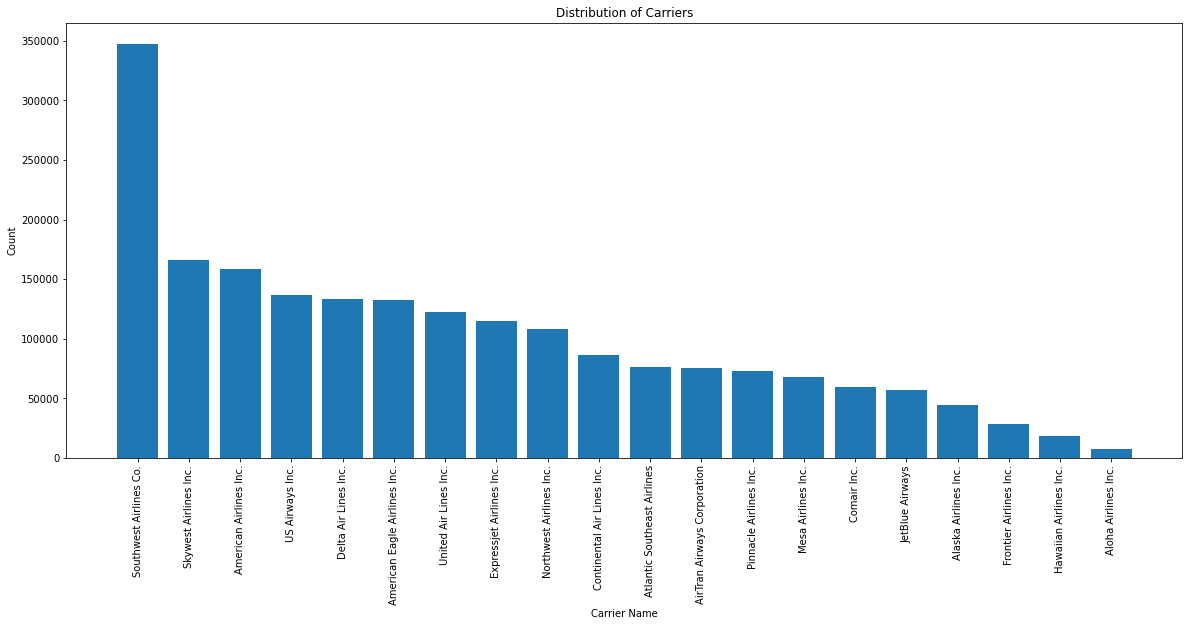

In [24]:
# plotting Carriers

plt.figure(figsize=[20, 8])
plt.bar(x = df_filtered.Carrier_Name.value_counts().keys(), height = df_filtered.Carrier_Name.value_counts() )
plt.xlabel('Carrier Name')
plt.ylabel('Count')
plt.title('Distribution of Carriers')
plt.xticks(rotation=90)
plt.show()

Day of Week's distribution shows little difference by day. On Wednesday, there are slightly more flights then other days. I will look at the relationship between the day of the week and the delay next part.

For carrier names, there are 20 carriers, with Southwest Airlines CO. accounting for the largest number. 

Next, I'll look at the graph of the Manufacturer.

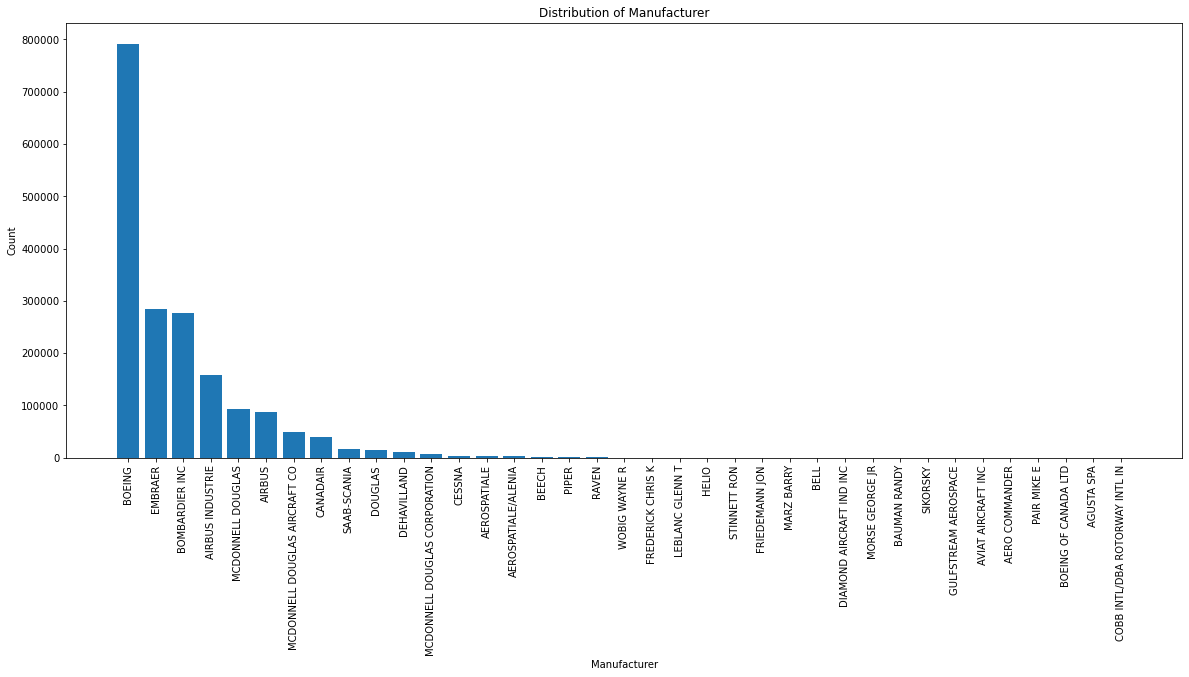

In [25]:
# plotting Manufacturers

plt.figure(figsize=[20, 8])
plt.bar(x = df_filtered.manufacturer.value_counts().keys(), height = df_filtered.manufacturer.value_counts() )
plt.xlabel('Manufacturer')
plt.ylabel('Count')
plt.title('Distribution of Manufacturer')
plt.xticks(rotation=90)
plt.show()

In [26]:
df_filtered.manufacturer.value_counts()

BOEING                            791761
EMBRAER                           284536
BOMBARDIER INC                    276597
AIRBUS INDUSTRIE                  157971
MCDONNELL DOUGLAS                  92839
AIRBUS                             88277
MCDONNELL DOUGLAS AIRCRAFT CO      49903
CANADAIR                           39126
SAAB-SCANIA                        17353
DOUGLAS                            15293
DEHAVILLAND                        10575
MCDONNELL DOUGLAS CORPORATION       7206
CESSNA                              4177
AEROSPATIALE                        2660
AEROSPATIALE/ALENIA                 2639
BEECH                               1715
PIPER                               1626
RAVEN                               1073
WOBIG WAYNE R                        422
FREDERICK CHRIS K                    386
LEBLANC GLENN T                      384
HELIO                                381
STINNETT RON                         376
FRIEDEMANN JON                       372
MARZ BARRY      

The plot of the distribution of Manufacturer shows that about 10 manufacturers make up the majority. it is a long-tail graph and there are outliers need to be modified for analysis. Since manufacturers which have small number of flights can reduce clearity of visualization of data, I decided to leave only major manufacturers. As removing ouliers, I'll include data from major manufacturers with more than 500 flights for anlysis.

In [27]:
# remove manufacturers under 500 flights
manufac_count = df_filtered.manufacturer.value_counts().rename_axis("Manufacturer").reset_index(name="count").query( 'count > 500')
manufac_count

,Manufacturer,count
0,BOEING,791761
1,EMBRAER,284536
2,BOMBARDIER INC,276597
3,AIRBUS INDUSTRIE,157971
4,MCDONNELL DOUGLAS,92839
5,AIRBUS,88277
6,MCDONNELL DOUGLAS AIRCRAFT CO,49903
7,CANADAIR,39126
8,SAAB-SCANIA,17353
9,DOUGLAS,15293


In [28]:
df_filtered = df_filtered[df_filtered['manufacturer'].isin(manufac_count['Manufacturer'])]
df_filtered.manufacturer.value_counts()

BOEING                           791761
EMBRAER                          284536
BOMBARDIER INC                   276597
AIRBUS INDUSTRIE                 157971
MCDONNELL DOUGLAS                 92839
AIRBUS                            88277
MCDONNELL DOUGLAS AIRCRAFT CO     49903
CANADAIR                          39126
SAAB-SCANIA                       17353
DOUGLAS                           15293
DEHAVILLAND                       10575
MCDONNELL DOUGLAS CORPORATION      7206
CESSNA                             4177
AEROSPATIALE                       2660
AEROSPATIALE/ALENIA                2639
BEECH                              1715
PIPER                              1626
RAVEN                              1073
Name: manufacturer, dtype: int64

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

 First, the Arrival Delay graph is almost similar to normal distribution. Slightly skewed to the right but has a perfect bell shape. The Departure Delay is similarly unimodal, but it is estimated to be more dense than the Arrival Delay. Neither graph required transformation.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

The AirTime and Distance plots showed the distribution of both variables right-skewed and have outliers. Therefore, I removed the outlier from the both variables. 

For category variables, outliers were also identified in the manufacturer variable. Since some major manufacturers have almost 95% of flights in this data set, manufacturers which were less then 500 flights were removed for this project. This process is expected to increase the accuracy of the analysis.

## Bivariate Exploration

First, I'll start with looking at the pairwise correlations present between varibles in the datasets.

In [29]:
numeric_vars = ['ArrDelay', 'DepDelay', 'AirTime', 'Distance']
categoric_vars = ['DayOfWeek', 'manufacturer', 'Carrier_Name']

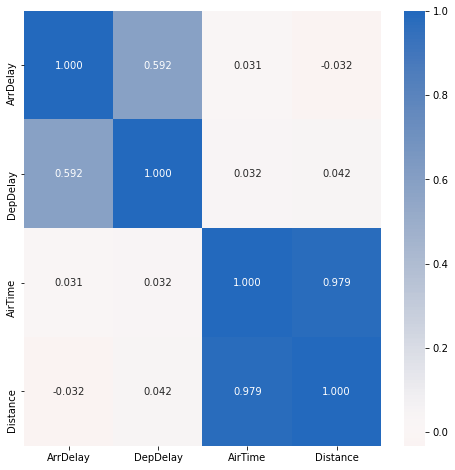

In [30]:
# correlation plot
plt.figure(figsize = [8, 8])
sb.heatmap(df_filtered[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

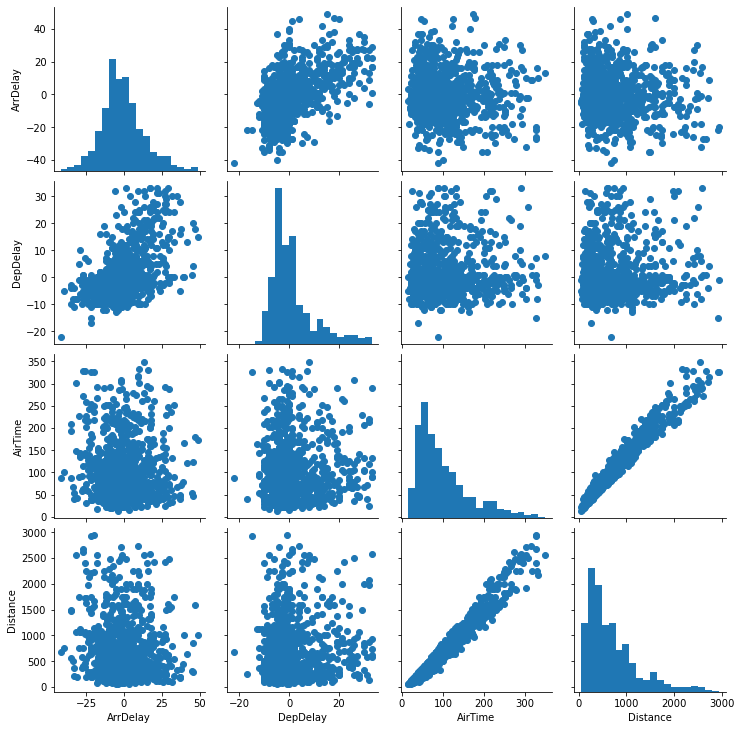

In [31]:
# plot matrix: sample 1000 flights so that plots are clearer and render faster
samples = np.random.choice(df_filtered.index, 1000, replace = False)
df_filtered_sample = df_filtered.loc[samples,:]


g = sb.PairGrid(data = df_filtered_sample, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20)
g.map_offdiag(plt.scatter);

 Above two plots shows the correlation between numeral variables. First of all, the Departure Delay and the Arrival Delay are correlated, but strength is relatively weak. AirTime and Distance are high-corrected with one another. So the longer the flight distance, the longer the flight time will be. Therefore, these two variables have strong relationship. This result is natural.

However the relationships between Delay Time and other variables like AirTime and Distance are not as expected. In the previous section, i expected to find out the relationship between AirTime or Distance with increase of delay time. It was assumed that there would be a correlation between Delay Time and the two variables. But the analysis shows that there is no realation between these variables with little correlation. So I won't perform any further analyses with these variables since they don't look like they'll be of much further interest.

Next, let's move on to finding out the relationship between categorical variables and Delay Time.

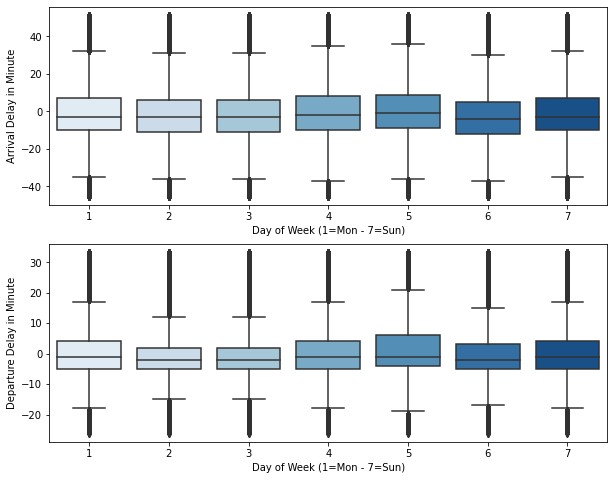

In [32]:
# boxplot Delay Time vs Day of Week

plt.figure(figsize = [10, 8])

# subplot 1: Arrival Delay vs. Day of Week
plt.subplot(2, 1, 1)
sb.boxplot(data = df_filtered, x = 'DayOfWeek', y = 'ArrDelay', palette='Blues')
plt.xlabel('Day of Week (1=Mon - 7=Sun)')
plt.ylabel('Arrival Delay in Minute');

# subplot 2: Departure Delay vs. Day of Week
plt.subplot(2, 1, 2)
sb.boxplot(data = df_filtered, x = 'DayOfWeek', y = 'DepDelay', palette='Blues')
plt.xlabel('Day of Week (1=Mon - 7=Sun)')
plt.ylabel('Departure Delay in Minute');

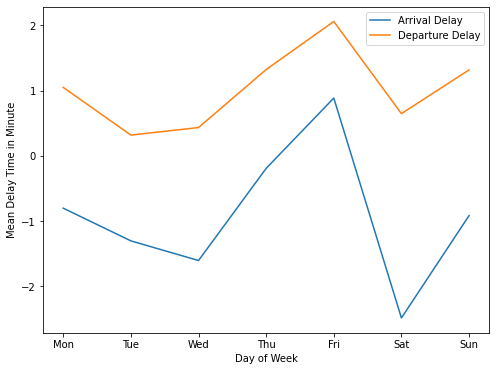

In [33]:
# line plots to observe Mean delay change per day
Delay_mean = df_filtered.groupby('DayOfWeek').agg({'ArrDelay':'mean', 'DepDelay':'mean'})

plt.figure(figsize = [8, 6])
plt.plot( Delay_mean.index, Delay_mean.ArrDelay )
plt.plot( Delay_mean.index, Delay_mean.DepDelay )
plt.xlabel('Day of Week')
plt.ylabel('Mean Delay Time in Minute')
plt.legend(['Arrival Delay', 'Departure Delay'])
plt.xticks( np.arange(1, len(DayOfWeeKLabel)+1), DayOfWeeKLabel)
plt.show()

Above two plots shows the relationship between Day of Week and delay time. The difference of delay time between days of the week is not significant. It can be seen that for the Arrival Delay, the distribution was all similar, and Friday has slightly higher mean. In the plot of delay in departure, the distribution varies more than the delay in arrival, and it is also shown that the delay time is longer on Friday.

The second plot shows the mean time of delay for each day of the week. It also shows the longest delay time on Friday. However, the actual practical difference is not that significant because the unit of time delay is 'minutes'.

Let's look at relationships between Delay Time and Manufacturers

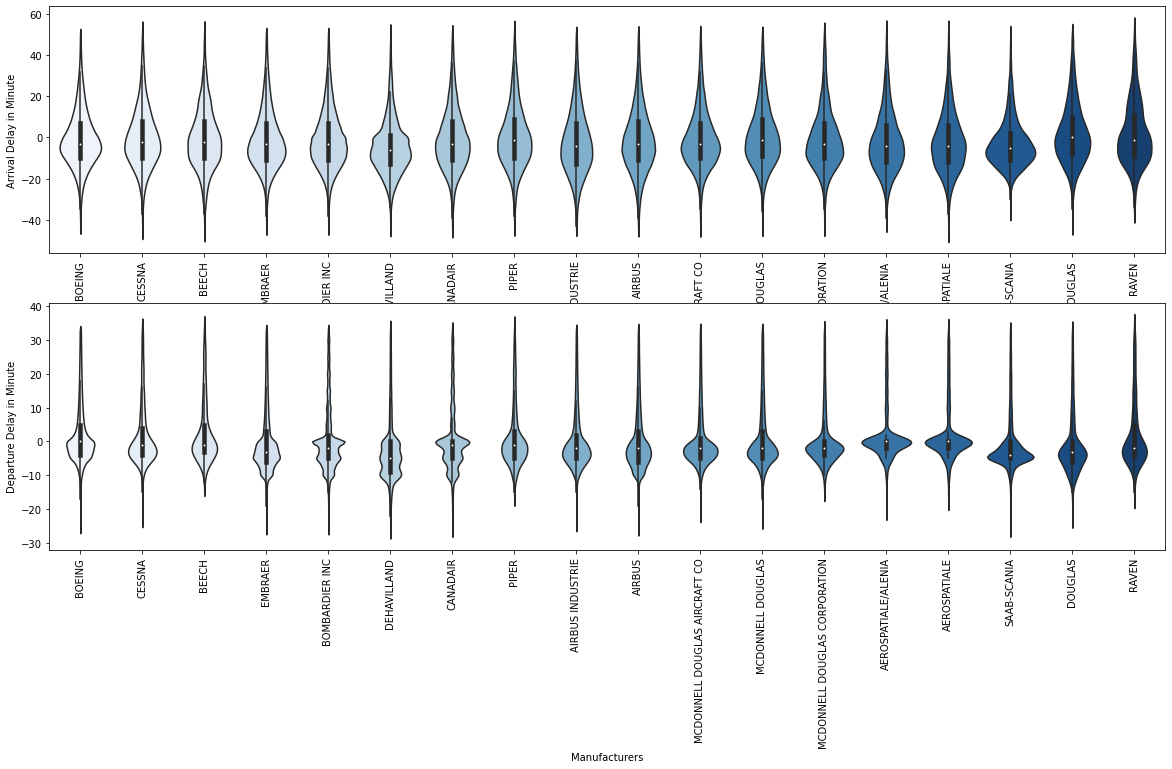

In [34]:
# violin plot: Delay Time vs. Manufacturer

plt.figure(figsize = [20, 10])

# subplot 1: Arrival Delay vs. Manufacturer
plt.subplot(2, 1, 1)
sb.violinplot(data = df_filtered, x = 'manufacturer', y = 'ArrDelay', palette='Blues')
plt.xlabel('Manufacturers')
plt.xticks(rotation=90)
plt.ylabel('Arrival Delay in Minute');

# subplot 2: Departure Delay vs. Manufacturer
plt.subplot(2, 1, 2)
sb.violinplot(data = df_filtered, x = 'manufacturer', y = 'DepDelay', palette='Blues')
plt.xlabel('Manufacturers')
plt.xticks(rotation=90)
plt.ylabel('Departure Delay in Minute');

Here, you can see that each type of delay(arrival, departure) takes on a different shape in each manufacturers. Arrival Delay plot shows most of distributions are normal. However some bimodality is suggested in Departure Delay. Relatively high density is observed in Departure Delay, and also skewed positively.

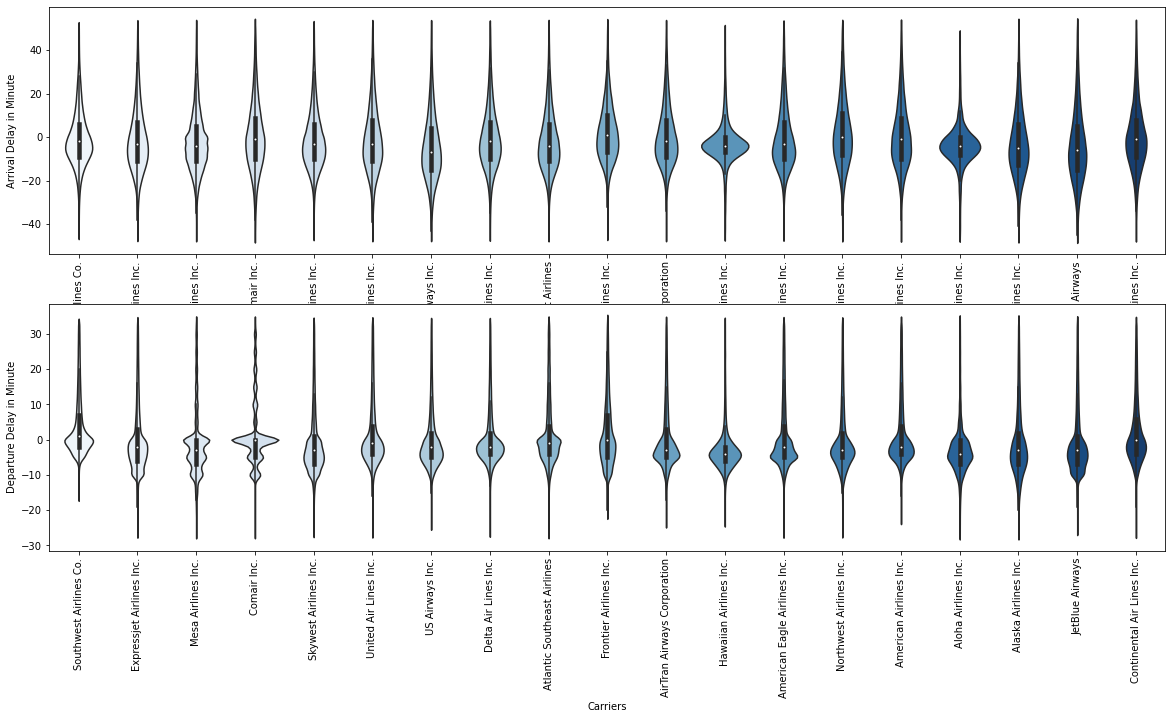

In [35]:
# violin plot: Delay Time vs. Carriers

plt.figure(figsize = [20, 10])

# subplot 1: Arrival Delay vs. arriers
plt.subplot(2, 1, 1)
sb.violinplot(data = df_filtered, x = 'Carrier_Name', y = 'ArrDelay', palette='Blues')
plt.xlabel('Carriers')
plt.xticks(rotation=90)
plt.ylabel('Arrival Delay in Minute');

# subplot 2: Departure Delay vs. Carriers
plt.subplot(2, 1, 2)
sb.violinplot(data = df_filtered, x = 'Carrier_Name', y = 'DepDelay', palette='Blues')
plt.xlabel('Carriers')
plt.xticks(rotation=90)
plt.ylabel('Departure Delay in Minute');

This is a violin plot that can identify the shape of the delay time depending in each carries. Similar to the above results, Arrival Delay is almost normally distributed. On the other hand, the bimodal distribution is suggested and the density is high in Departure Delay.

In addition, I will use bar plot to find out which manufacturer or carries has the longest delay time.

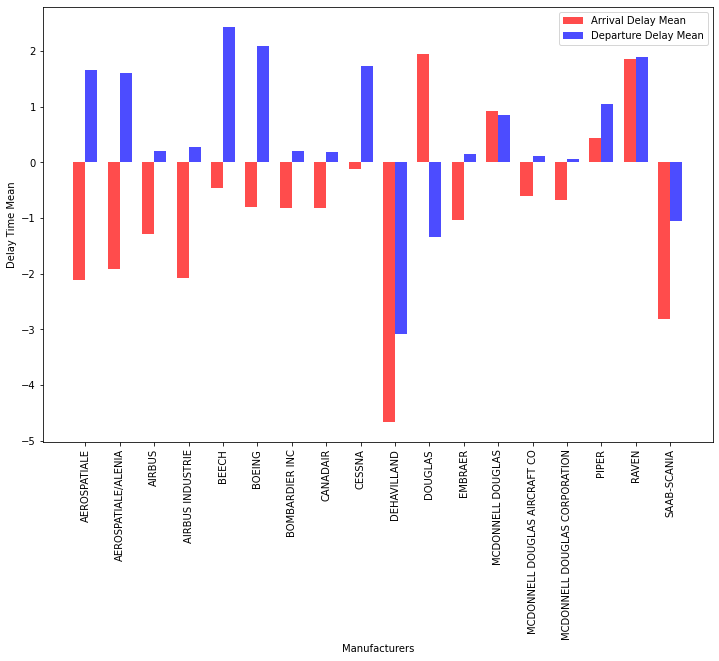

In [42]:
# Bar plots to observe Mean delay change per day
# find mean delay time by manufacturers
Delay_manu = df_filtered.groupby('manufacturer').agg({'ArrDelay':'mean', 'DepDelay':'mean'})

ind = np.arange(len(Delay_manu))  # the x locations for the groups
width = 0.35       # the width of the bars

plt.figure(figsize = [12, 8])
red_bars = plt.bar(ind, Delay_manu['ArrDelay'], width, color='r', alpha=.7, label='Arrival Delay Mean')
blue_bars = plt.bar(ind + width, Delay_manu['DepDelay'], width, color='b', alpha=.7, label='Departure Delay Mean')

# title and labels
plt.ylabel('Delay Time Mean')
plt.xlabel('Manufacturers')
locations = ind + width / 2  # xtick locations

# code ref.
# https://thispointer.com/python-pandas-how-to-get-column-and-row-names-in-dataframe/
labels = Delay_manu.index.values

# code ref.
#https://stackoverflow.com/questions/10998621/rotate-axis-text-in-python-matplotlib
plt.xticks(locations, labels, rotation=90)


# legend
plt.legend() ;

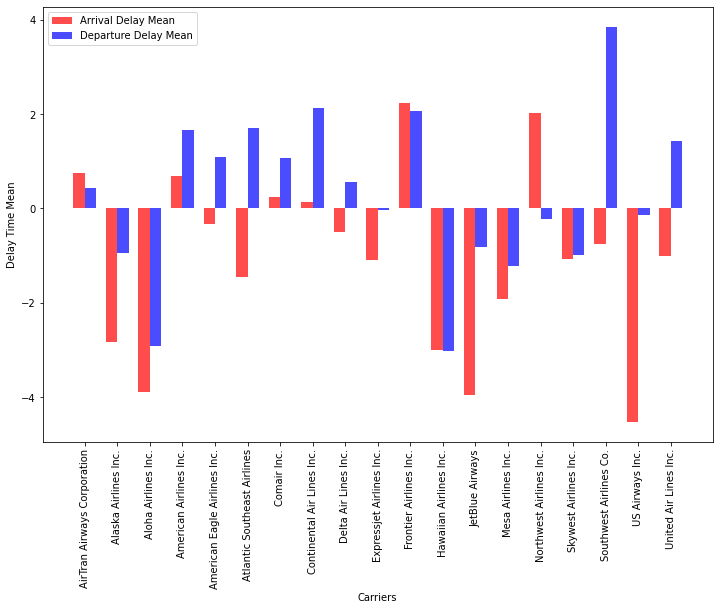

In [58]:
# Bar plots to observe Mean delay change per day
# find mean delay time by manufacturers
Delay_carr = df_filtered.groupby('Carrier_Name').agg({'ArrDelay':'mean', 'DepDelay':'mean'})

ind2 = np.arange(len(Delay_carr))  # the x locations for the groups
width = 0.35       # the width of the bars

plt.figure(figsize = [12, 8])
red_bars = plt.bar(ind2, Delay_carr['ArrDelay'], width, color='r', alpha=.7, label='Arrival Delay Mean')
blue_bars = plt.bar(ind2 + width, Delay_carr['DepDelay'], width, color='b', alpha=.7, label='Departure Delay Mean')

# title and labels
plt.ylabel('Delay Time Mean')
plt.xlabel('Carriers')
locations = ind2 + width / 2  # xtick locations

# code ref.
# https://thispointer.com/python-pandas-how-to-get-column-and-row-names-in-dataframe/
labels = Delay_carr.index.values

# code ref.
#https://stackoverflow.com/questions/10998621/rotate-axis-text-in-python-matplotlib
plt.xticks(locations, labels, rotation=90)


# legend
plt.legend() ;

Interestingly, there are a difference in the mean delay time according to the Manufacturers and Carriers. 
First of all, the manufacturer with the most delays in arrival was Douglas while the company has a negative departure delay mean.
Beech was the manufacturer with the most Departure delays, followed by Boeing.
For Carriers, Frontier Airlines has the highest arrival delay mean, and Southwest Airlines Co. has the highest departure delay mean.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

The results of the relationship between the two variables are as follows:

- Delays in departure and arrival are correlated. But the stregth is weak.
- Delay time and distance are not correlated
- Delay time and AirTime are not correlated either.
- The difference of the delay time according to the day of the week is not that significant. However, analysis shows that delays occur most frequently on Friday.
- Beech is the manufacturer with the most departure delay, and Southwest Airlines Co. is the airline.
- Douglas is the manufacturer of the most arrival delay, and Frontier Airlines Inc. is the airline.



## Multivariate Exploration


The main objective is to see how each category variable relates to the increase in delay time.

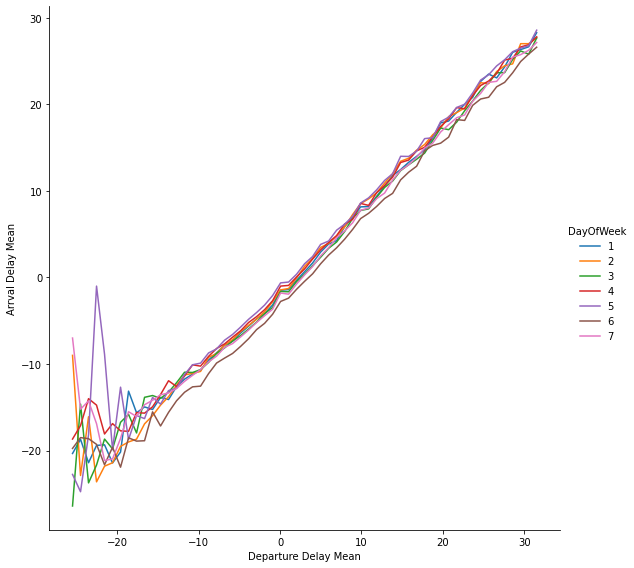

In [66]:
def mean_poly(x, y, bins = 10, **kwargs):
    """ Custom adapted line plot code. """
    # set bin edges if none or int specified
    if type(bins) == int:
        bins = np.linspace(x.min(), x.max(), bins+1)
    bin_centers = (bins[1:] + bins[:-1]) / 2

    # compute counts
    data_bins = pd.cut(x, bins, right = False, include_lowest = True)
    means = y.groupby(data_bins).mean() 

    # create plot
    plt.errorbar(x = bin_centers, y = means, **kwargs)


#bin_edges = np.arange(0, df_filtered['DepDelay'].max()+10, 10)
g = sb.FacetGrid( df_filtered, hue = 'DayOfWeek', size = 8)
g.map(mean_poly, "DepDelay", "ArrDelay", bins = 60 )
g.set_ylabels('Arrval Delay Mean')
g.set_xlabels('Departure Delay Mean')
g.add_legend() ;


This is the plot to examine the effect of the day of week on the increase of delay time.
The plot shows that when the mean of arrival and departure delays is both high, there is little difference by day.
However, if the average arrival and departure delay mean are low, the difference between days of the week was shown.

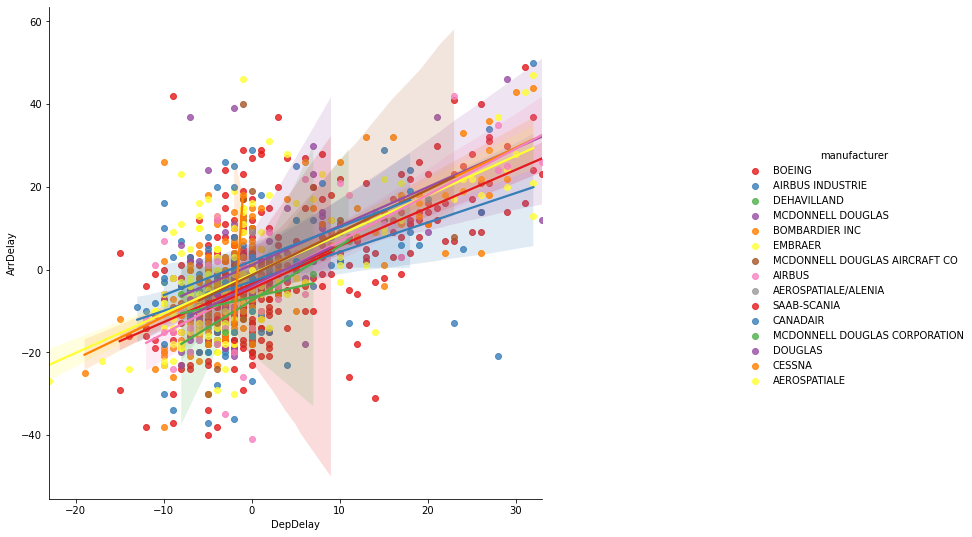

In [70]:
# plot matrix: sample 1000 flights so that plots are clearer and they render faster
# Delay Time vs. Manufacturers

samples = np.random.choice(df_filtered.index, 1000, replace = False)
df_filtered_sample = df_filtered.loc[samples,:]

g = sb.lmplot(data = df_filtered_sample, x="DepDelay", y="ArrDelay", hue="manufacturer", palette="Set1") 
g.fig.set_size_inches(15,8) ;

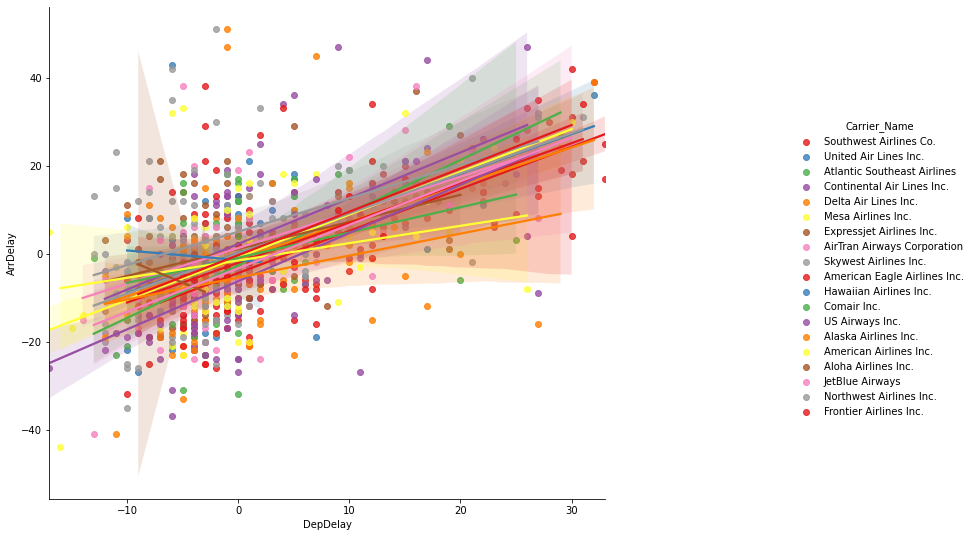

In [71]:
# plot matrix: sample 1000 flights so that plots are clearer and they render faster
# Delay Time vs. Carriers

samples = np.random.choice(df_filtered.index, 1000, replace = False)
df_filtered_sample = df_filtered.loc[samples,:]

g = sb.lmplot(data = df_filtered_sample, x="DepDelay", y="ArrDelay", hue="Carrier_Name", palette="Set1") 
g.fig.set_size_inches(15,8) ; 

These figure illustrates the differences between manufacturers or Carriers in the increase of delay times. To make plots clear and fast er, I sampled 1000 flights randomly. For most manufacturers, the arrival delay also increased as the departure delay time increased. That is, most manufacturers have a positive slope. However, the slope was different for each manufacturer.

Relationship between delay times and Carriers shows similar results. Most airlines have positive tendencies, and the inclination varies from carriers to carriers.

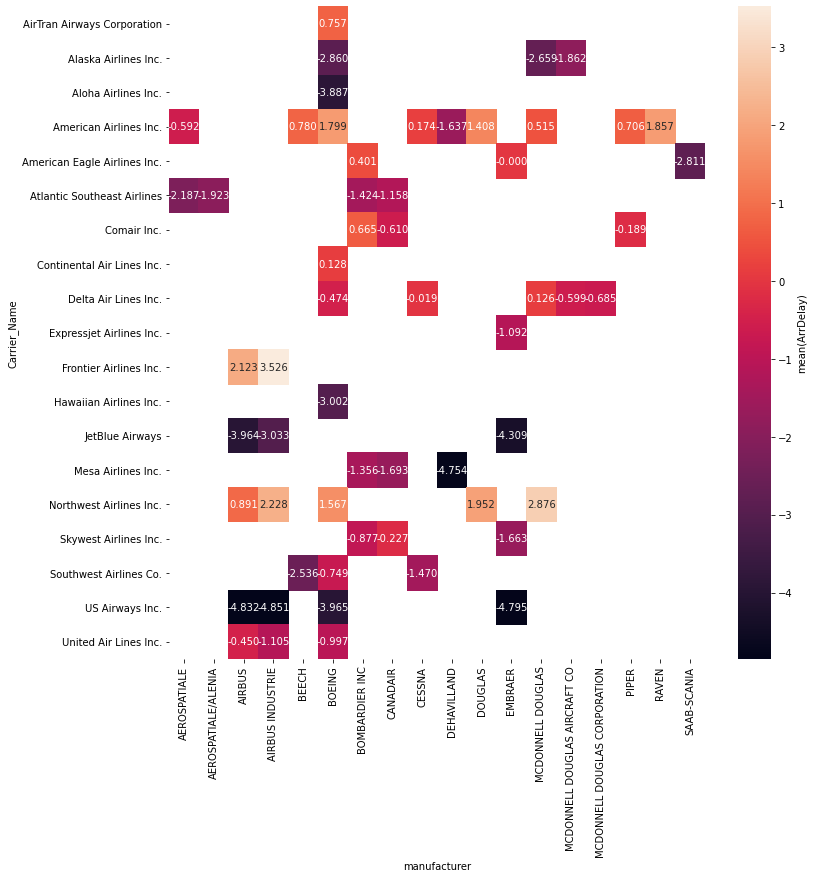

In [74]:
# HeatMap plot: Average Arrival Delay vs. Manufacturers and Carriers
cat_means = df_filtered.groupby(['manufacturer', 'Carrier_Name']).mean()['ArrDelay']
cat_means = cat_means.reset_index(name = 'Arrival_Delay_avg')
cat_means = cat_means.pivot(index = 'Carrier_Name', columns = 'manufacturer',
                            values = 'Arrival_Delay_avg')

plt.figure(figsize=(12,12))

sb.heatmap(cat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(ArrDelay)'}) ;

Finally, let's look at the arrival delay time by manufacturer and airline through the heat map.

The blanks on the heat map occur because each airline has several selected manufacturer's planes.

First of all, it was the earliest arrival time when it was the airplane of **Airbus Industries** carried by **US Airways Inc**. In other hands, longest arrival delays was shown by **Frontier Airlines.Inc**, which operates planes manufactured by **Airbus Industries**.

It is interesting that even airplanes made by the same manufacturer have different delays depending on carriers.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

The findings in this part include:

- The day of the week has little effect on the increase in departure delay and arrival delay.
- If the delay time is negative (i.e., fast arrival), there seems to be a difference by day of the week.
- The tendency to increase the delay time depending on the manufacturer does not change, but the extent of the increase (slope) is different.
- The tendency to increase delay time by airlines does not change, but the extent of increase (slope) is different.
- The arrival delay time was different when both manufacturers and airlines were considered.
- Even if the manufacturer is idendical, the delay time varies depending on the airline and vice versa.